Dependencies

In [5]:
import numpy as np
from numpy.linalg import inv # invert a matrix
import matplotlib.pyplot as plt
%matplotlib inline


The data: 
X = Uncalibrated Measurements in pixels
Y = Reference/known diameters (thousanths of an inch)

In [6]:
x = np.array([137.6,302,397,462,523,695])
y = np.array([30.1,62.5,81.4,93.7,106.2,140])

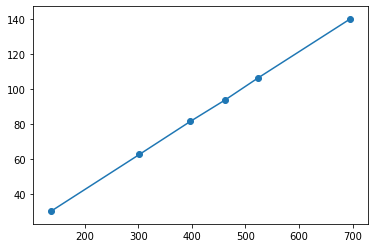

In [8]:
fig, ax = plt.subplots()
lines = ax.plot(x,y)
ax.scatter(x,y)
plt.show()

When we plot the data, we see some serious correlation between the measurements and the reference.  We can fit a first order linear model to the data in the following form, where beta a is a vector of coefficients, in this case just length two with the intercept and slope:

\begin{equation*}
Y = \beta X + \epsilon
\end{equation*}

In [ ]:
We are able to find an unbiased estimate of the coefficients (beta) by defining our loss function as the squared error, and minimizing with respect to beta.

\begin{equation*}
arg \quad min \ (Y - \beta X)^2 \\ 
\frac{d}{dx} \quad -2X^tY + 2BX^tX = 0 \\
\beta = X^tY(X^tX)^-1
\end{equation*}

In Python,

In [38]:
# Create a class object
class lindmod:
    # initialize
    def _init_(self,x,y):
        self.coef = None
        
    # fit the line    
    def fit(self,x,y):
        # create a column of ones in order to get an intercept
        x = np.c_[np.ones(x.shape[0]),x]
        self.coef =  (np.transpose(x) @ (y)) @ inv(np.transpose(x) @ x)
        self.mse = sum((y - x @ np.transpose(self.coef))**2)
    
    # Prediction
    def predict(self,xnew):
        
        return self.coef[0] + np.dot(xnew,self.coef[1:])


In [48]:
model = lindmod()
model.fit(x,y)
coefs = model.coef
coefs

array([2.96500295, 0.19713502])

In [55]:
model.predict(695)

array([139.97383936])

Use a known library to check our calculations

In [42]:
from sklearn.linear_model import LinearRegression

In [47]:
model2 = LinearRegression()
model2.fit(x.reshape(-1,1),y) # reshape data to 6x1
print(model2.intercept_)
print(model2.coef_)

2.965002948244262
[0.19713502]


Checks out.  We can also plot the new line on top of the old line

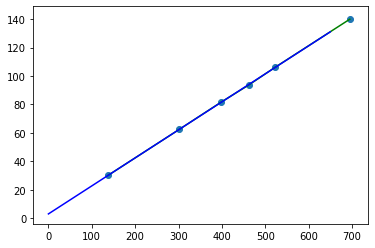

In [53]:
xsim = np.arange(0,700,50)
ysim = xsim * coefs[1] + coefs[0]
fig, ax = plt.subplots()
lines = ax.plot(x,y,'-g')
lines = ax.plot(xsim,ysim,'-b')
ax.scatter(x,y)
plt.show()

complete overlap